In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

path = './pictures'

(278, 282)
(278, 282)


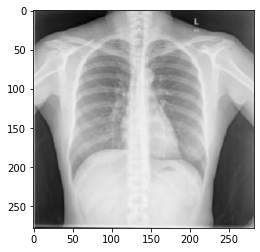

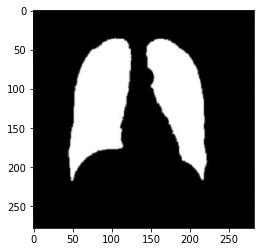

In [14]:
fstr_0 = os.path.join(path,'lung.png')
fstr_1 = os.path.join(path,'lung_mask.png')
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE) 

plt.figure()
plt.imshow(img,cmap=plt.cm.gray)
plt.figure()
plt.imshow(mask,cmap=plt.cm.gray)
print(img.shape)
print(mask.shape)

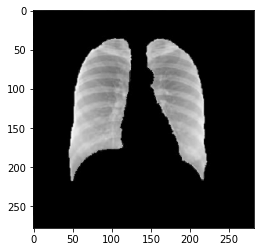

In [15]:
#_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
masked_roi = cv2.bitwise_and(img,mask)


plt.figure()
plt.imshow(masked_roi,cmap=plt.cm.gray)

In [16]:
masked_roi[masked_roi<10] = 0

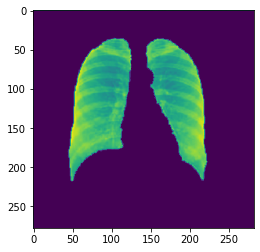

In [17]:
plt.imshow(masked_roi)

# mask를 통해 잘라내기

In [35]:
masked_roi_4 = masked_roi.copy()
mask_2 = mask.copy()
ret, inverse = cv2.threshold(mask_2, -1, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierachy= cv2.findContours(inverse, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
print(rects)

[(144, 37, 78, 179), (46, 36, 80, 182), (0, 0, 282, 1)]


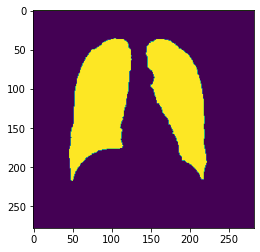

In [33]:
plt.imshow(inverse)

In [45]:
#(x, y, w, h)
start_point_x = rects[1][1]
x_jump = rects[0][0] - rects[1][0] + rects[1][2]
start_point_y = rects[0][1]
y_jump = rects[0][1] - rects[1][1] + rects[1][3]

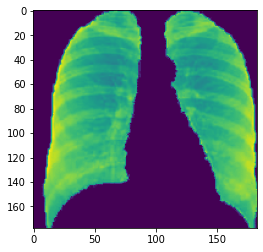

In [47]:
image_result = masked_roi_4[start_point_x : (start_point_x + x_jump),
                              start_point_y : (start_point_y + y_jump)]
plt.imshow(image_result)

## 이후 imsave로 저장하면 됨!!!!!!